<a href="https://colab.research.google.com/github/phoneCha/UsedCar-analysis/blob/main/Used_car_wow007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CPE300/203
## **Case Study:** Student Lifestyle and Technology Survey Analysis
 Dataset: [Download](https://drive.google.com/file/d/1Zv6ABdtBMVxD2nGuOjwAHmOeD2PqdCK9/view?usp=sharing)

## 1. Download Dataset

In [1]:
#Get the Shareable link
#link : https://drive.google.com/file/d/16v3DlqOtvGz-op-b94bA_r7Y02HlDeh2/view?usp=sharing
#link : https://drive.google.com/file/d/1Zv6ABdtBMVxD2nGuOjwAHmOeD2PqdCK9/view?usp=sharing
import gdown
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_id = '16v3DlqOtvGz-op-b94bA_r7Y02HlDeh2'
output_file = 'D3_UsedCar.csv'
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file)


Downloading...
From: https://drive.google.com/uc?id=16v3DlqOtvGz-op-b94bA_r7Y02HlDeh2
To: /content/D3_UsedCar.csv
100%|██████████| 194k/194k [00:00<00:00, 54.1MB/s]


'D3_UsedCar.csv'

--2024-05-27 16:11:35--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2024-05-27 16:11:35--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.01s   

2024-05-27 16:11:35 (9.58 MB/s) - ‘t

Text(0.1, 0.8, 'ทดสอบฟอนต์ภาษาไทย')

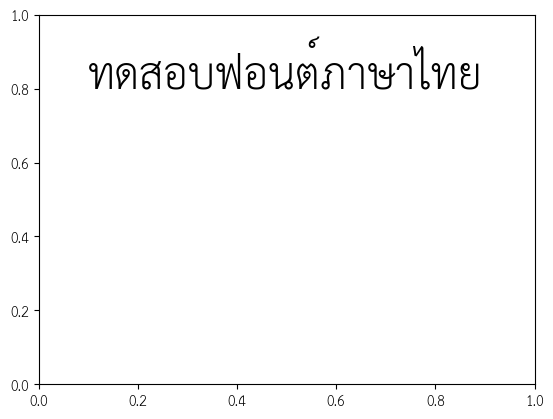

In [2]:
# install Thai Font on Colab env.
!wget "https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf" -O "thsarabunnew-webfont.ttf"
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New')
plt.text(0.1, 0.8, 'ทดสอบฟอนต์ภาษาไทย', {'size': 30})


In [3]:
df = pd.read_csv('D3_UsedCar.csv')
df.tail()

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
1548,1548,2020 Hyundai Creta SX Opt Diesel AT BSVI,Aug-20,Comprehensive,Diesel,5,35000,First Owner,Automatic,2020,1493.00,11345.0,11345.0,250.0,17.41
1549,1549,2022 Renault KWID 1.0 RXL Opt BSVI,2022,Third Party insurance,Petrol,5,10000,999 cc,2022,Power Steering,999.00,6706.0,6706.0,91.0,3.98
1550,1550,2017 Honda WR-V i-VTEC S,Jun-17,Comprehensive,Petrol,5,49000,First Owner,Manual,2017,17.50,1199.0,1199.0,887.0,5.85
1551,1551,2018 Volkswagen Polo 1.0 MPI Comfortline,May-18,Comprehensive,Petrol,5,40000,Second Owner,Manual,2018,18.78,999.0,999.0,75.0,4.75
1552,1552,2018 Maruti Swift Dzire VXI,May-18,Comprehensive,Petrol,5,34756,First Owner,Manual,2018,20.85,1197.0,1197.0,8314.0,6.10


In [4]:
df.describe()

,Unnamed: 0,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
count,1553.000000,1553.000000,1553.000000,1550.000000,1.550000e+03,1.550000e+03,1.549000e+03,1553.000000
mean,776.000000,91.480361,52841.931101,236.927277,1.471857e+10,1.471857e+10,1.423989e+04,166.141494
std,448.456798,2403.424060,40067.800347,585.964295,2.185629e+11,2.185629e+11,9.666241e+04,3478.855090
min,0.000000,4.000000,620.000000,7.810000,5.000000e+00,5.000000e+00,5.000000e+00,1.000000
25%,388.000000,5.000000,30000.000000,16.342500,1.197000e+03,1.197000e+03,4.000000e+02,4.660000
50%,776.000000,5.000000,49134.000000,18.900000,1.462000e+03,1.462000e+03,1.173000e+03,7.140000
75%,1164.000000,5.000000,70000.000000,22.000000,1.995000e+03,1.995000e+03,8.850000e+03,17.000000
max,1552.000000,67000.000000,810000.000000,3996.000000,3.258640e+12,3.258640e+12,1.464800e+06,95000.000000


## 2. Data Preprocessing (data cleaning)

In [5]:
# Drop column that irrelevant about issue
irrelevant_columns = ['registration_year', 'insurance_validity','fuel_type','seats','transmission','manufacturing_year']
df = df.drop(columns=irrelevant_columns)
print(df)


      Unnamed: 0                                           car_name  \
0              0                    2017 Mercedes-Benz S-Class S400   
1              1  2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI   
2              2                       2018 BMW X1 sDrive 20d xLine   
3              3                           2019 Kia Seltos GTX Plus   
4              4                    2019 Skoda Superb LK 1.8 TSI AT   
...          ...                                                ...   
1548        1548           2020 Hyundai Creta SX Opt Diesel AT BSVI   
1549        1549                 2022 Renault KWID 1.0 RXL Opt BSVI   
1550        1550                           2017 Honda WR-V i-VTEC S   
1551        1551           2018 Volkswagen Polo 1.0 MPI Comfortline   
1552        1552                        2018 Maruti Swift Dzire VXI   

      kms_driven    ownsership  mileage(kmpl)  engine(cc)  max_power(bhp)  \
0          56000   First Owner           7.81      2996.0          299

[link text](https://)### 2.1 Splitting Multiple Selections into Separate Rows

This can be done using the explode() function in pandas, but before that, we need to convert the comma-separated strings to lists and strip() method removes any leading, and trailing whitespaces.

In [6]:
# Drop row that missing values
df = df.dropna()
print(df)

      Unnamed: 0                                           car_name  \
0              0                    2017 Mercedes-Benz S-Class S400   
1              1  2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI   
2              2                       2018 BMW X1 sDrive 20d xLine   
3              3                           2019 Kia Seltos GTX Plus   
4              4                    2019 Skoda Superb LK 1.8 TSI AT   
...          ...                                                ...   
1548        1548           2020 Hyundai Creta SX Opt Diesel AT BSVI   
1549        1549                 2022 Renault KWID 1.0 RXL Opt BSVI   
1550        1550                           2017 Honda WR-V i-VTEC S   
1551        1551           2018 Volkswagen Polo 1.0 MPI Comfortline   
1552        1552                        2018 Maruti Swift Dzire VXI   

      kms_driven    ownsership  mileage(kmpl)  engine(cc)  max_power(bhp)  \
0          56000   First Owner           7.81      2996.0          299

In [7]:
# Remove Duplicates
df = df.drop_duplicates()
print(df)
# df
# df.duplicated().sum()

      Unnamed: 0                                           car_name  \
0              0                    2017 Mercedes-Benz S-Class S400   
1              1  2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI   
2              2                       2018 BMW X1 sDrive 20d xLine   
3              3                           2019 Kia Seltos GTX Plus   
4              4                    2019 Skoda Superb LK 1.8 TSI AT   
...          ...                                                ...   
1548        1548           2020 Hyundai Creta SX Opt Diesel AT BSVI   
1549        1549                 2022 Renault KWID 1.0 RXL Opt BSVI   
1550        1550                           2017 Honda WR-V i-VTEC S   
1551        1551           2018 Volkswagen Polo 1.0 MPI Comfortline   
1552        1552                        2018 Maruti Swift Dzire VXI   

      kms_driven    ownsership  mileage(kmpl)  engine(cc)  max_power(bhp)  \
0          56000   First Owner           7.81      2996.0          299

In [8]:
# Handle Outliers

# Numerical
numcols = ["kms_driven","mileage(kmpl)","engine(cc)","max_power(bhp)","torque(Nm)","price(in lakhs)"]
for cols in numcols :
  Q1 = df[cols].quantile(0.25)
  Q3 = df[cols].quantile(0.75)
  IQR = Q3 - Q1

  # Define bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Filter out outliers
  df = df[(df[cols] >= lower_bound) & (df[cols] <= upper_bound)]

print(df)


      Unnamed: 0                                           car_name  \
1              1  2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI   
2              2                       2018 BMW X1 sDrive 20d xLine   
3              3                           2019 Kia Seltos GTX Plus   
4              4                    2019 Skoda Superb LK 1.8 TSI AT   
5              5                       2017 Honda Jazz 1.2 S i VTEC   
...          ...                                                ...   
1546        1546                              2018 Honda Jazz V CVT   
1547        1547                         2022 Maruti Ertiga VXI CNG   
1550        1550                           2017 Honda WR-V i-VTEC S   
1551        1551           2018 Volkswagen Polo 1.0 MPI Comfortline   
1552        1552                        2018 Maruti Swift Dzire VXI   

      kms_driven    ownsership  mileage(kmpl)  engine(cc)  max_power(bhp)  \
1          30615   First Owner          17.40       999.0           99

In [9]:
# Convert Data Types

# Convert multiple columns to specific data types
df[['kms_driven', 'mileage(kmpl)', 'engine(cc)',"max_power(bhp)","torque(Nm)","price(in lakhs)"]] = df[['kms_driven', 'mileage(kmpl)', 'engine(cc)',"max_power(bhp)","torque(Nm)","price(in lakhs)"]].astype('int')
df['ownsership'] = df['ownsership'].astype('string')

# Print the DataFrame to verify the changes
print(df)



      Unnamed: 0                                           car_name  \
1              1  2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI   
2              2                       2018 BMW X1 sDrive 20d xLine   
3              3                           2019 Kia Seltos GTX Plus   
4              4                    2019 Skoda Superb LK 1.8 TSI AT   
5              5                       2017 Honda Jazz 1.2 S i VTEC   
...          ...                                                ...   
1546        1546                              2018 Honda Jazz V CVT   
1547        1547                         2022 Maruti Ertiga VXI CNG   
1550        1550                           2017 Honda WR-V i-VTEC S   
1551        1551           2018 Volkswagen Polo 1.0 MPI Comfortline   
1552        1552                        2018 Maruti Swift Dzire VXI   

      kms_driven    ownsership  mileage(kmpl)  engine(cc)  max_power(bhp)  \
1          30615   First Owner             17         999             

In [10]:
# Check and Correct


# df.dropna(inplace=True)
# Define the list of valid values
valid_values = ['First Owner', 'Second Owner']

# Filter the DataFrame
df = df[df['ownsership'].isin(valid_values)]
# Replace 'car_name' column with the extracted brand names
df['car_name'] = df['car_name'].apply(lambda x: x.split()[1])
# Print the filtered DataFrame
print(df)



      Unnamed: 0    car_name  kms_driven    ownsership  mileage(kmpl)  \
1              1      Nissan       30615   First Owner             17   
2              2         BMW       24000   First Owner             20   
3              3         Kia       18378   First Owner             16   
4              4       Skoda       44900   First Owner             14   
5              5       Honda       42000   First Owner             18   
...          ...         ...         ...           ...            ...   
1546        1546       Honda       19446   First Owner             18   
1547        1547      Maruti       26500   First Owner             26   
1550        1550       Honda       49000   First Owner             17   
1551        1551  Volkswagen       40000  Second Owner             18   
1552        1552      Maruti       34756   First Owner             20   

      engine(cc)  max_power(bhp)  torque(Nm)  price(in lakhs)  
1            999             999        9863               

<ipython-input-10-c7297c713c90>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['car_name'] = df['car_name'].apply(lambda x: x.split()[1])


In [11]:
#after cleaned save file
# df.to_csv('/content/D3_UsedCarCleaned.csv', index=False)

### 2.3 Analyzing the Frequency of Each Selection

In [12]:
# สถิติเชิงพรรณนา (Descriptive statistic)
import statistics

print("Mode of car_name:",statistics.mode(df['car_name']))
print("Mean of kms_driven:",statistics.mean(df['kms_driven']))
print("Mode of ownership:",statistics.mode(df['ownsership']))

print("Mean of mileage(kmpl):",statistics.mean(df['mileage(kmpl)']))
print("Mean of engine(cc):",statistics.mean(df['engine(cc)']))
print("Mean of max_power(bhp):",statistics.mean(df['max_power(bhp)']))
print("Mean of torque(Nm):",statistics.mean(df['torque(Nm)']))
print("Mean of price(in lakhs):",statistics.mean(df['price(in lakhs)']))

Mode of car_name: Maruti
Mean of kms_driven: 53672.39234449761
Mode of ownership: First Owner
Mean of mileage(kmpl): 18.47177033492823
Mean of engine(cc): 1437.5808612440192
Mean of max_power(bhp): 1437.5808612440192
Mean of torque(Nm): 5126.451674641148
Mean of price(in lakhs): 7.921531100478469


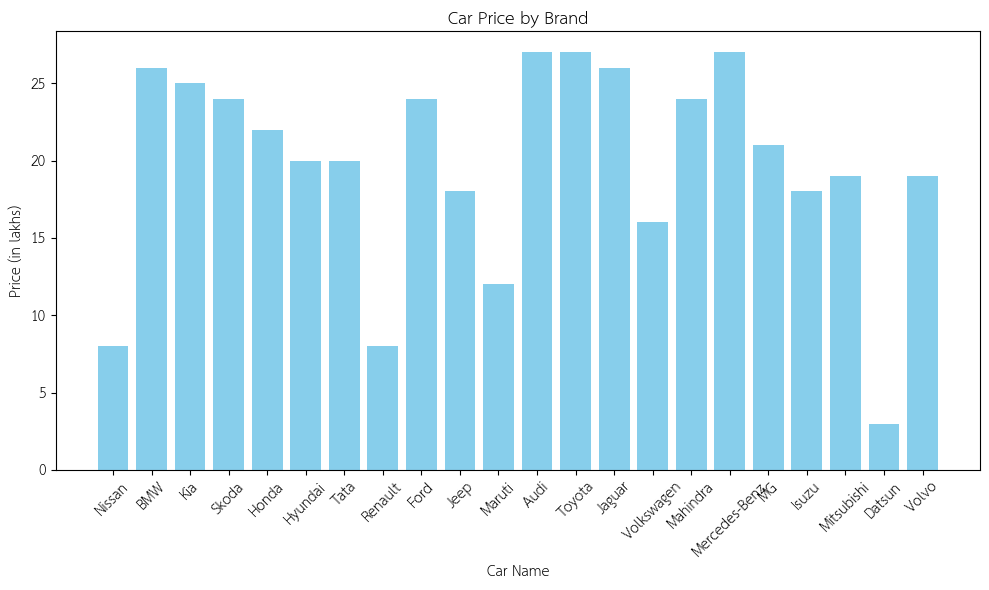

In [13]:
 # ตัวแปรต้น : แบรนด์ , ตัวแปรตาม : ราคาขาย
import pandas as pd
import matplotlib.pyplot as plt

# สร้างกราฟ
plt.figure(figsize=(10, 6))
plt.bar(df['car_name'], df['price(in lakhs)'], color='skyblue')
plt.xlabel('Car Name')
plt.ylabel('Price (in lakhs)')
plt.title('Car Price by Brand')
plt.xticks(rotation=45)  # หมุนชื่อแบรนด์รถในแกน x เพื่ออ่านง่ายขึ้น
plt.tight_layout()
plt.show()



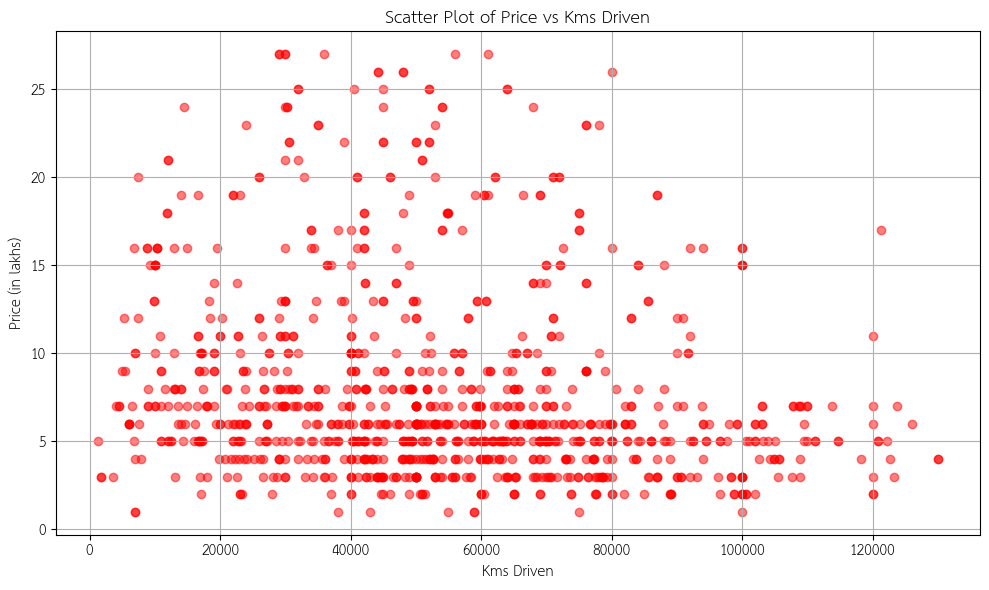

In [14]:
# ตัวแปรต้น : kms_driver , ตัวแปรตาม : ราคาขาย
plt.figure(figsize=(10, 6))
plt.scatter(df['kms_driven'], df['price(in lakhs)'], color='red', alpha=0.5)
plt.xlabel('Kms Driven')
plt.ylabel('Price (in lakhs)')
plt.title('Scatter Plot of Price vs Kms Driven')
plt.grid(True)
plt.tight_layout()
plt.show()

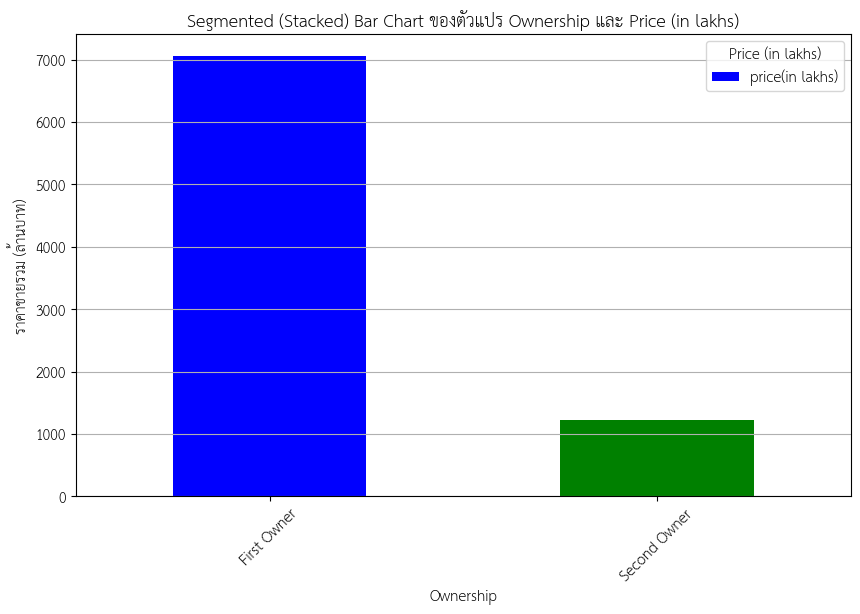

In [15]:
# ตัวแปรต้น : Ownership , ตัวแปรตาม : ราคาขาย

# หายอดรวมของราคาขายสำหรับแต่ละกลุ่ม ownership
ownership_price_sum = df.groupby('ownsership')['price(in lakhs)'].sum()

# สร้าง Segmented (Stacked) Bar Chart
plt.figure(figsize=(10, 6))
ownership_price_sum.plot(kind='bar', stacked=True, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Segmented (Stacked) Bar Chart ของตัวแปร Ownership และ Price (in lakhs)')
plt.xlabel('Ownership')
plt.ylabel('ราคาขายรวม (ล้านบาท)')
plt.xticks(rotation=45)
plt.legend(title='Price (in lakhs)')
plt.grid(axis='y')
plt.show()


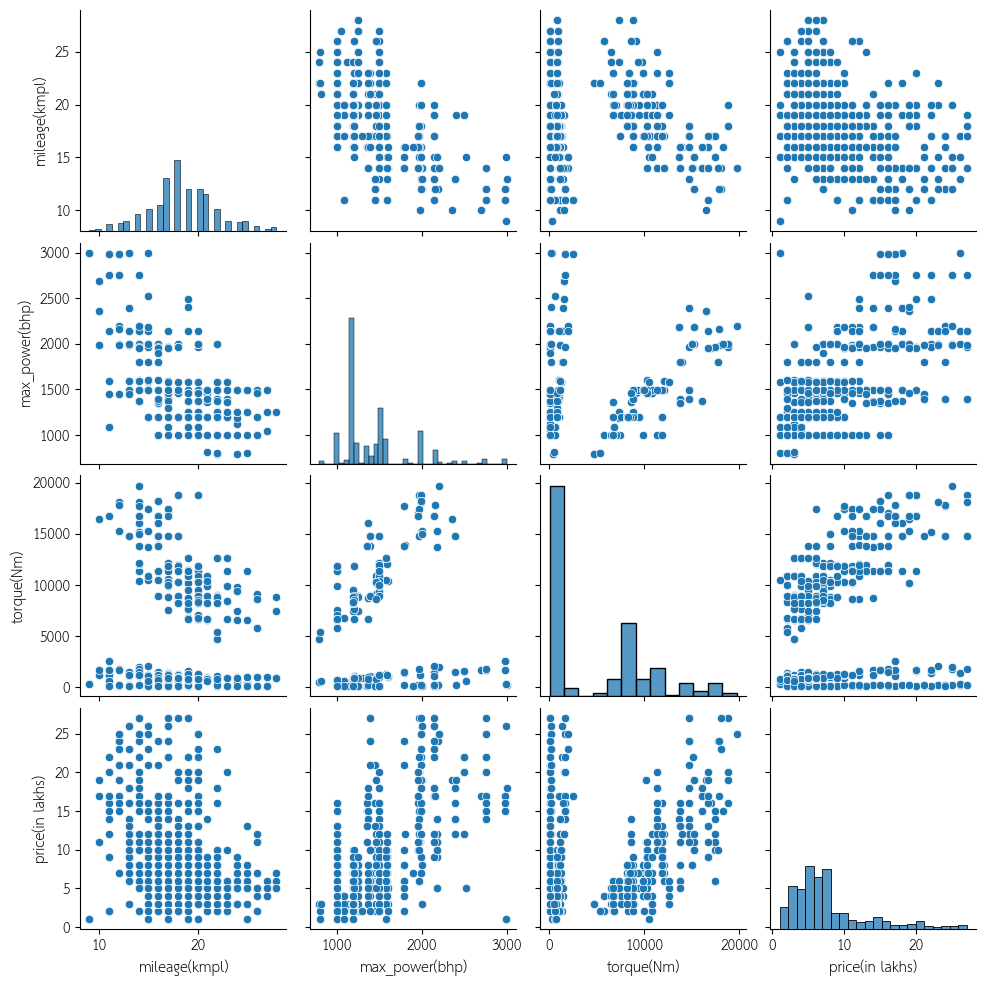

In [16]:
# ตัวแปรต้น : mileage(kmpl), max_power(bhp), torque(Nm), price(in lakhs) , ตัวแปรตาม : ราคาขาย

# สร้าง Scatterplot Matrix
sns.pairplot(df, vars=['mileage(kmpl)', 'max_power(bhp)', 'torque(Nm)', 'price(in lakhs)'])


# แสดงผลลัพธ์
plt.show()

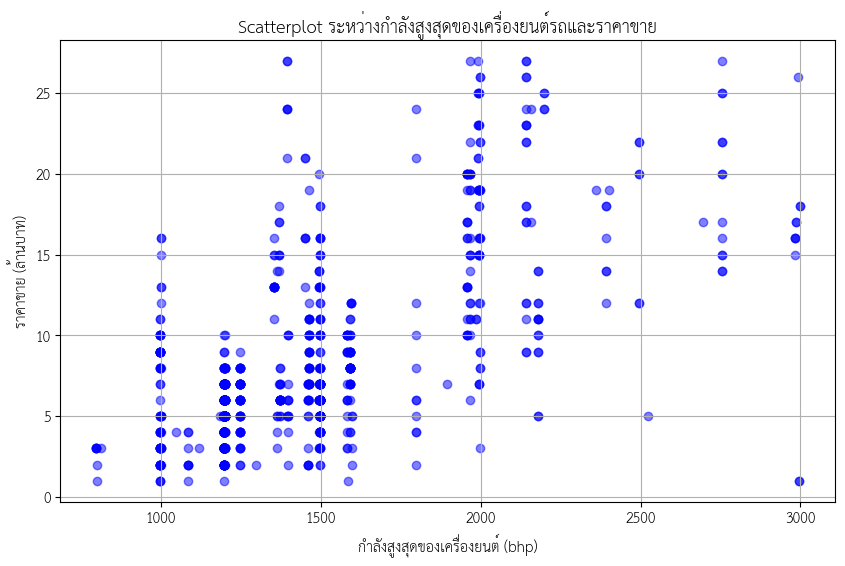

In [17]:
# ตัวแปรต้น : กำลังสูงสุดของเครื่องยนต์รถ (max_power(bhp)) , ตัวแปรตาม : ราคาขาย

# สร้าง Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df['max_power(bhp)'], df['price(in lakhs)'], color='blue', alpha=0.5)
plt.title('Scatterplot ระหว่างกำลังสูงสุดของเครื่องยนต์รถและราคาขาย')
plt.xlabel('กำลังสูงสุดของเครื่องยนต์ (bhp)')
plt.ylabel('ราคาขาย (ล้านบาท)')
plt.grid(True)
plt.show()

In [18]:
#สถิติอ้างอิง (Inference statistics)
'''
ตัวแปรต้น : แบรนด์
ตัวแปรตาม : ราคาขาย

H0: แบรนด์ไม่มีผลต่อราคาขายรถยนต์ระหว่างแบรนด์รถยนต์ที่มีชื่อเสียงและแบรนด์ที่ไม่มีชื่อเสียง
H1: แบร์นมีผลต่อราคาขายรถยนต์ระหว่างแบรนด์รถยนต์ที่มีชื่อเสียงและแบรนด์ที่ไม่มีชื่อเสียง

อนุมานผล : จากข้อมูลพบว่าค่า F = 52.639457 ซึ่งมีค่ามากกว่า 1 มาก และ ค่า PR(>F) = 1.885451e-146 ซึ่งเป็นค่าที่น้อยมาก
แสดงถึงความแต่งต่างระห่างกลุ่มของแบรนด์รถยนต์และราคาขายอย่างมีนัยสำคัญ ดังนั้น สนับสนุนสมมติฐาน H1 และ ปฏิเสธสมมติฐาน H0
'''

import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

# Load the dataset
# df = pd.read_csv("D3_UsedCar.csv")

# Rename the column to remove parentheses and spaces
df.rename(columns={'price(in lakhs)': 'price_in_lakhs'}, inplace=True)

# Create ANOVA model
model = ols('price_in_lakhs ~ C(car_name)', data=df).fit()
# Create ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)



                   sum_sq      df          F         PR(>F)
C(car_name)  16565.399669    21.0  52.639457  1.885451e-146
Residual     15330.165881  1023.0        NaN            NaN


In [19]:
'''
ตัวแปรต้น : kms_Driver
ตัวแปรตาม : ราคาขาย

H0: ระยะทางขับรถไม่มีผลต่อราคาขายรถยนต์
H1: ระยะทางขับรถมีผลต่อราคาขายรถยนต์

อนุมานผล:  จากข้อมูลพบว่าค่า F = 36.641643 ซึ่งมีค่ามากกว่า 1 มาก และ ค่า PR(>F) = 1.977745e-09 ซึ่งเป็นค่าที่น้อยมาก
แสดงถึงความแต่งต่างระห่างกลุ่มของระยะทางขับและราคาขายรถยนต์อย่างมีนัยสำคัญ ดังนั้น สนับสนุนสมมติฐาน H1 และ ปฏิเสธสมมติฐาน H0 '''

model = ols('price_in_lakhs ~ kms_driven', data=df).fit()
# Create ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)



                  sum_sq      df          F        PR(>F)
kms_driven   1082.494315     1.0  36.641643  1.977745e-09
Residual    30813.071235  1043.0        NaN           NaN


In [20]:
'''
ตัวแปรต้น : owsnership รถที่ผ่านมากกว่า 1 มือ
ตัวแปรตาม : ราคาขาย

H0: รถยนต์ที่ผ่านการใช้งานมากกว่า 1 มือไม่มีความสัมันธ์กับราคาขาย
H1: รถยนต์ที่ผ่านการใช้งานมากกว่า 1 มือมีความสัมพันธ์กับราคาขาย

อนุมานผล: จากข้อมูลพบว่า ค่า chi-square statistic = 98.8894 โดยมีระดับนัยสำคัญหรือค่า p-value = 1.962481e-10 ซึ่งน้อยกว่า 0.05
แสดงว่า ownership และราคาขายมีความสัมพันธ์กันอย่างมีนัยสำคัญ ดั้งนั้น สนับสนุนสมมติฐาน H1 และ ปฏิเสธสมมติฐาน H0 '''


from scipy.stats import chi2_contingency
df.columns = df.columns.str.strip()
print(df.columns)

contingency_table = pd.crosstab(df['ownsership'], df['price_in_lakhs'])

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Index(['Unnamed: 0', 'car_name', 'kms_driven', 'ownsership', 'mileage(kmpl)',
       'engine(cc)', 'max_power(bhp)', 'torque(Nm)', 'price_in_lakhs'],
      dtype='object')
Chi-square statistic: 98.8894007385354
p-value: 1.9624581993080403e-10
Degrees of freedom: 26
Expected frequencies table:
[[  7.69090909  41.87272727  96.56363636  91.43636364 141.85454545
  117.07272727  81.18181818  52.98181818  35.89090909  35.89090909
   20.50909091  17.09090909  18.8         10.25454545  17.09090909
   18.8         10.25454545   9.4         12.81818182  12.81818182
    5.12727273   7.69090909   5.98181818   6.83636364   6.83636364
    4.27272727   5.98181818]
 [  1.30909091   7.12727273  16.43636364  15.56363636  24.14545455
   19.92727273  13.81818182   9.01818182   6.10909091   6.10909091
    3.49090909   2.90909091   3.2          1.74545455   2.90909091
    3.2          1.74545455   1.6          2.18181818   2.18181818
    0.87272727   1.30909091   1.01818182   1.16363636   1.16363636
    0.7

In [21]:
'''
ตัวแปรต้น : mileage ระยะทางขับรถต่อลิตร
ตัวแปรตาม : ราคาขาย

H0: ระยะทางขับรถต่อลิตรไม่มีผลต่อราคาขายรถยนต์
H1: ระยะทางขับรถต่อลิตรมีผลต่อราคาขายรถยนต์

อนุมานผล : จากข้อมูลพบว่า ค่า F =1.100938 ซึ่งมีค่าใกล้เคียงเท่ากับ 1 และ ค่า PR(>F) =2.943040e-01 ซึ่งมีค่ามากกว่า 0.05 แสดงถึง
ไม่มีความแตกต่างของระยะทางขับรถต่อลิตรและราคาขายรถยนต์ ดั้งนั้น ไม่มีหลักฐานทางสถิติที่มีประสิทธิภาพเพียงพอที่จะยอมรับสมมติฐาน H1 และปฎิเสธสมมติฐาน H0

______________________________________________________________________________________________________________________________________

ตัวแปรต้น :engine power กำลังสูงสุด
ตัวแปรตาม : ราคาขาย

H0: กำลังสูงสุดไม่มีผลต่อราคาขายรถยนต์
H1: กำลังสูงสุดมีผลต่อราคาขายรถยนต์

อนุมานผล : จากข้อมูลพบว่า ค่า F =616.307282และ ค่า PR(>F) = 3.097675e-107 ซึ่งมีค่ามากกว่า 0.05 และเป็นค่าที่น้อยมาก
แสดงถึงความแตกต่างของประสิทธิภาพกำลังสูงสุดและราคาขายรถยนต์อย่างมีนัยสำคัญ ดังนั้น สนับสนุนสมมติฐาน H1 และ ปฏิเสธสมมติฐาน H0

______________________________________________________________________________________________________________________________________

ตัวแปรต้น : torque ประสิทธิภาพแรงบิด
ตัวแปรตาม : ราคาขาย

H0: ประสิทธิภาพแรงบิดไม่มีผลต่อราคาขายรถยนต์
H1: ประสิทธิภาพแรงบิดมีผลต่อราคาขายรถยนต์

อนุมานผล : จากข้อมูลพบว่า ค่า F = 109.313250 และ ค่า PR(>F) = 2.131161e-24 ซึ่งมีค่ามากกว่า 0.05 และเป็นค่าที่น้อยมาก
แสดงถึงความแตกต่างของประสิทธิภาพแรงบิดและราคาขายรถยนต์อย่างมีนัยสำคัญ ดังนั้น สนับสนุนสมมติฐาน H1 และ ปฏิเสธสมมติฐาน H0
'''

import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

df.rename(columns={'mileage(kmpl)': 'mileage'}, inplace=True)
df.rename(columns={'engine(cc)': 'engine'}, inplace=True)
df.rename(columns={'max_power(bhp)': 'max_power'}, inplace=True)
df.rename(columns={'torque(Nm)': 'torque'}, inplace=True)
print(df)
model = ols('price_in_lakhs ~ mileage + engine + torque', data=df).fit()
# Create ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

      Unnamed: 0    car_name  kms_driven    ownsership  mileage  engine  \
1              1      Nissan       30615   First Owner       17     999   
2              2         BMW       24000   First Owner       20    1995   
3              3         Kia       18378   First Owner       16    1353   
4              4       Skoda       44900   First Owner       14    1798   
5              5       Honda       42000   First Owner       18    1199   
...          ...         ...         ...           ...      ...     ...   
1546        1546       Honda       19446   First Owner       18    1199   
1547        1547      Maruti       26500   First Owner       26    1462   
1550        1550       Honda       49000   First Owner       17    1199   
1551        1551  Volkswagen       40000  Second Owner       18     999   
1552        1552      Maruti       34756   First Owner       20    1197   

      max_power  torque  price_in_lakhs  
1           999    9863               8  
2          1995

In [22]:
'''
ตัวแปรต้น : max-power กำลังสูงสุดของเครื่องยนต์รถในแรงม้า
ตัวแปรตาม : ราคาขาย

H0: กำลังสูงสุดของเครื่องยนต์รถในแรงม้าไม่มีผลต่อราคาขายรถยนต์
H1: กำลังสูงสุดของเครื่องยนต์รถในแรงม้ามีผลต่อราคาขายรถยนต์

อนุมานผล : จากข้อมูลพบว่า ค่า F = 838.2624 และ ค่า PR(>F) = 9.497703e-136 ซึ่งน้อยกว่า 0.05
แสดงถึงแสดงถึงความแต่งต่างระห่างกลุ่มของกำลังสูงสุดของเครื่องยนต์รถในแรงม้าและราคาขายรถยนต์อย่างมีนัยสำคัญ ดั้งนั้น สนับสนุนสมมติฐาน H1 และ ปฏิเสธสมมติฐาน H0
'''

model = ols('price_in_lakhs ~ max_power', data=df).fit()
# Create ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq      df           F         PR(>F)
max_power  14212.188086     1.0  838.262498  9.497703e-136
Residual   17683.377465  1043.0         NaN            NaN


## 3. Summary Dataset